In [706]:
#import all imp libraries 
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import os 
import csv
import time
print("libraries imported sucessfully !!!")

libraries imported sucessfully !!!


In [707]:
#just to see what is in the data set 
import csv
with open('../input/corrosion_final_data.csv','rt')as file:
    data = csv.reader(file)
    for row in data:
        print(row)

['-1', '-1', '-1', '-572']
['-1', '-1', '-1', '-591']
['1', '-1', '-1', '-577']
['1', '-1', '-1', '-594']
['-1', '1', '-1', '-575']
['-1', '1', '-1', '-587']
['1', '1', '-1', '-568']
['1', '1', '-1', '-589']
['-1', '-1', '1', '-569']
['-1', '-1', '1', '-592']
['1', '-1', '1', '-574']
['1', '-1', '1', '-588']
['-1', '1', '1', '-573']
['-1', '1', '1', '-593']
['1', '1', '1', '-576']
['1', '1', '1', '-558']
['0', '0', '0', '-554']
['0', '0', '0', '-615']
['-2', '0', '0', '-557']
['2', '0', '0', '-610']
['0', '-2', '0', '-551']
['0', '2', '0', '-611']
['0', '0', '-2', '-558']
['0', '0', '2', '-618']
['0', '0', '0', '-586']
['0', '0', '0', '-590']
['0', '0', '0', '-582']
['0', '0', '0', '-581']
['0', '0', '0', '-591']
['0', '0', '0', '-588']
['0', '0', '0', '-587']


In [708]:
#in the above dataset we see that there are 3 input variables (X) and 1 output variable Y=F(X)
#Input variables are N,S,F and output variable corrosion_pit_otential/mv 
#load the dataset 
dataset = pd.read_csv('../input/corrosion_final_data.csv',delimiter = ',')
print("dataset imported sucessfully !")

dataset imported sucessfully !


In [709]:
print(dataset.iloc[:, :-1])

    -1  -1.1  -1.2
0   -1    -1    -1
1    1    -1    -1
2    1    -1    -1
3   -1     1    -1
4   -1     1    -1
5    1     1    -1
6    1     1    -1
7   -1    -1     1
8   -1    -1     1
9    1    -1     1
10   1    -1     1
11  -1     1     1
12  -1     1     1
13   1     1     1
14   1     1     1
15   0     0     0
16   0     0     0
17  -2     0     0
18   2     0     0
19   0    -2     0
20   0     2     0
21   0     0    -2
22   0     0     2
23   0     0     0
24   0     0     0
25   0     0     0
26   0     0     0
27   0     0     0
28   0     0     0
29   0     0     0


In [710]:
print(dataset.iloc[:, -1])

0    -591
1    -577
2    -594
3    -575
4    -587
5    -568
6    -589
7    -569
8    -592
9    -574
10   -588
11   -573
12   -593
13   -576
14   -558
15   -554
16   -615
17   -557
18   -610
19   -551
20   -611
21   -558
22   -618
23   -586
24   -590
25   -582
26   -581
27   -591
28   -588
29   -587
Name: -572, dtype: int64


In [711]:
#Split datasets in input values(x) and output values(y)
#data pre-processing for regression
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
print("dataset split sucessfully !!")

dataset split sucessfully !!


In [712]:
#standardize dataset and reshape the dataset
X = StandardScaler().fit_transform(X)
Y = StandardScaler().fit_transform(Y.reshape(len(Y),1))[:, 0]
print("dataset reshaped sucessfully !!!!")

dataset reshaped sucessfully !!!!


In [713]:
#split into train and test
trainX, testX, trainY, testY = model_selection.train_test_split(X, Y, train_size = 0.75, test_size = 0.25)
print("dataset splitted to training and testing data sucessfully !!!")

dataset splitted to training and testing data sucessfully !!!


In [714]:
#Nh=Ns/(α∗(Ni+No))
#ie; 30/(2(3+1)) = 3.75 approx 4
#the first hidden layer has 4 nodes and uses relu
#the second hidden layer has 3 nodes and uses relu activation function
#the output layer had one node and uses sigmoid activation function 
#setting input layer with right no. of input features by setting it to 3 for 3 input features
model = Sequential()
model.add(Dense(4, input_dim=3, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
print("specified sigmoid & activation functions for i/p & o/p layers !!!!")

specified sigmoid & activation functions for i/p & o/p layers !!!!


In [715]:
#model will be fit with stochastic gradient descent with a learning rate of 0.01 and momentum of 0.9
opt = SGD(lr = 0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer='adam', metrics =['mean_squared_error'])
print("loss function specified sucessfully !!!!")

loss function specified sucessfully !!!!


In [716]:
#training will be performed for 100 epochs and test set will be evaluated at the end of each epoch 
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size =10)
print("fitted model sucessfully !!!")

Train on 22 samples, validate on 8 samples
Epoch 1/100
22/22 [==============================] - 1s 31ms/step - loss: 1.2954 - mean_squared_error: 1.2954 - val_loss: 1.1270 - val_mean_squared_error: 1.1270
Epoch 2/100
22/22 [==============================] - 0s 609us/step - loss: 1.2920 - mean_squared_error: 1.2920 - val_loss: 1.1262 - val_mean_squared_error: 1.1262
Epoch 3/100
22/22 [==============================] - 0s 665us/step - loss: 1.2898 - mean_squared_error: 1.2898 - val_loss: 1.1254 - val_mean_squared_error: 1.1254
Epoch 4/100
22/22 [==============================] - 0s 708us/step - loss: 1.2871 - mean_squared_error: 1.2871 - val_loss: 1.1246 - val_mean_squared_error: 1.1246
Epoch 5/100
22/22 [==============================] - 0s 609us/step - loss: 1.2849 - mean_squared_error: 1.2849 - val_loss: 1.1240 - val_mean_squared_error: 1.1240
Epoch 6/100
22/22 [==============================] - 0s 618us/step - loss: 1.2829 - mean_squared_error: 1.2829 - val_loss: 1.1234 - val_mean_sq

Epoch 51/100
22/22 [==============================] - 0s 643us/step - loss: 1.2004 - mean_squared_error: 1.2004 - val_loss: 1.1017 - val_mean_squared_error: 1.1017
Epoch 52/100
22/22 [==============================] - 0s 597us/step - loss: 1.1994 - mean_squared_error: 1.1994 - val_loss: 1.1012 - val_mean_squared_error: 1.1012
Epoch 53/100
22/22 [==============================] - 0s 654us/step - loss: 1.1975 - mean_squared_error: 1.1975 - val_loss: 1.1007 - val_mean_squared_error: 1.1007
Epoch 54/100
22/22 [==============================] - 0s 595us/step - loss: 1.1961 - mean_squared_error: 1.1961 - val_loss: 1.1001 - val_mean_squared_error: 1.1001
Epoch 55/100
22/22 [==============================] - 0s 690us/step - loss: 1.1946 - mean_squared_error: 1.1946 - val_loss: 1.0994 - val_mean_squared_error: 1.0994
Epoch 56/100
22/22 [==============================] - 0s 582us/step - loss: 1.1930 - mean_squared_error: 1.1930 - val_loss: 1.0986 - val_mean_squared_error: 1.0986
Epoch 57/100
22/

fitted model sucessfully !!!


In [717]:
print(trainX)

[[-0.03809697 -0.03809697 -0.03809697]
 [-1.18100594  1.10481201 -1.18100594]
 [ 2.24772099 -0.03809697 -0.03809697]
 [-1.18100594 -1.18100594  1.10481201]
 [ 1.10481201 -1.18100594  1.10481201]
 [-0.03809697 -0.03809697 -0.03809697]
 [-0.03809697 -0.03809697 -0.03809697]
 [-2.32391492 -0.03809697 -0.03809697]
 [-0.03809697 -0.03809697 -0.03809697]
 [-1.18100594  1.10481201 -1.18100594]
 [ 1.10481201 -1.18100594  1.10481201]
 [ 1.10481201 -1.18100594 -1.18100594]
 [ 1.10481201  1.10481201  1.10481201]
 [ 1.10481201  1.10481201  1.10481201]
 [ 1.10481201  1.10481201 -1.18100594]
 [ 1.10481201 -1.18100594 -1.18100594]
 [-0.03809697 -0.03809697 -0.03809697]
 [-0.03809697 -0.03809697 -2.32391492]
 [-0.03809697 -0.03809697  2.24772099]
 [-0.03809697 -2.32391492 -0.03809697]
 [-0.03809697 -0.03809697 -0.03809697]
 [-0.03809697 -0.03809697 -0.03809697]]


In [718]:
print(trainY)

[-0.24559652  0.45058259 -1.57993981 -0.53567115  0.50859752  0.10249304
 -0.4196413   1.49485125 -0.30361145 -0.24559652 -0.30361145  0.33455274
  0.39256766  1.43683633  0.85668707 -0.651701    0.04447811  1.43683633
 -2.04405922  1.84294081 -1.87001444 -0.47765622]


In [719]:
print(testX)

[[-0.03809697  2.24772099 -0.03809697]
 [-1.18100594  1.10481201  1.10481201]
 [-0.03809697 -0.03809697 -0.03809697]
 [-0.03809697 -0.03809697 -0.03809697]
 [-1.18100594 -1.18100594 -1.18100594]
 [ 1.10481201  1.10481201 -1.18100594]
 [-1.18100594  1.10481201  1.10481201]
 [-1.18100594 -1.18100594  1.10481201]]


In [720]:
print(testY)

[-1.63795474  0.56661244 -0.18758159  1.66889603 -0.47765622 -0.36162637
 -0.59368607  0.79867215]


In [721]:
#evaluating the model 
# training and testing for mean squared error
train_mse = model.evaluate(trainX, trainY)
test_mse = model.evaluate(testX, testY)
print('Train: %.3f, Test: %.3f' % (train_mse[0], test_mse[0]))

8/8 [==============================] - 0s 391us/step
Train: 1.130, Test: 1.070


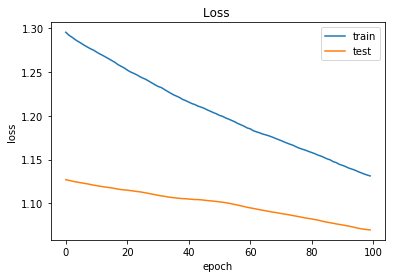

In [722]:
#plot loss during training
plt.title('Loss ')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

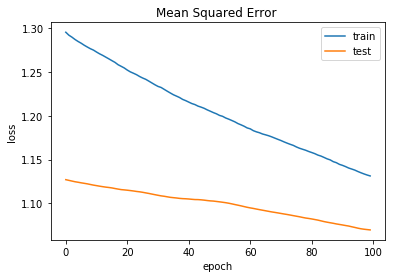

In [723]:
#plot mean squared error during training
plt.title('Mean Squared Error ')
plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='test')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()